In [37]:
from pyspark.sql.functions import randn, rand, sum, col, round
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [51]:
df18v1 = spark.read.csv('data/pluto_18v1.csv', header=True)
df18v2 = spark.read.csv('data/pluto.csv', header=True)
df17v11 = spark.read.csv('data/pluto_17v11.csv', header=True)

### convert column names all to lower case

In [52]:
df18v1 = df18v1.select([col(A).alias(A.lower()) for A in df18v1.schema.names])
df18v2 = df18v2.select([col(A).alias(A.lower()) for A in df18v2.schema.names])
df17v11 = df17v11.select([col(A).alias(A.lower()) for A in df17v11.schema.names])

In [53]:
cols = df18v1.columns

In [54]:
df18v1 = df18v1.select(cols)
df18v2 = df18v2.select(cols)
df17v11 = df17v11.select(cols)

In [55]:
df =df18v1.union(df18v2).union(df17v11)

In [56]:
start_time = time.time()
summary = df.groupBy("version").agg(sum("unitsres"),
                                    sum("lotarea"),
                                    sum("bldgarea"),
                                    sum("comarea"),
                                    sum("resarea"),
                                    sum("officearea"),
                                    sum("retailarea"),
                                    sum("garagearea"),
                                    sum("strgearea"),
                                    sum("factryarea"),
                                    sum("otherarea"),
                                    sum("assessland"),
                                    sum("assesstot"),
                                    sum("exemptland"),
                                    sum("exempttot"),
                                    sum("firm07_flag"),
                                    sum("pfirm15_flag"),
                                   sum(col("lotarea")*col("builtfar")),
                                   sum(col("lotarea")*col("residfar")),
                                   sum(col("lotarea")*col("commfar")),
                                   sum(col("lotarea")*col("facilfar"))).toPandas()
elapsed_time = time.time() - start_time

In [57]:
elapsed_time

18.663893222808838

In [58]:
agg_cols = ['version','UnitsRes','LotArea','BldgArea','ComArea',
 'ResArea','OfficeArea','RetailArea','GarageArea',
 'StrgeArea','FactryArea','OtherArea','AssessLand',
 'AssessTot','ExemptLand','ExemptTot','FIRM07_FLAG',
 'PFIRM15_FLAG','LotAreaXBuiltFAR', 'LotAreaXResidFAR',
'LotAreaXCommFAR', 'LotAreaXFacilFAR']

In [59]:
summary.columns = agg_cols

In [60]:
summary

,version,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
0,17v1.1,3535776.0,6.813541e+09,5.464293e+09,1.815464e+09,3.449799e+09,649838284.0,276187004.0,122093670.0,104659836.0,...,9.822458e+10,3.846283e+11,4.492449e+10,1.478786e+11,34569.0,65628.0,5.446584e+09,6.685347e+09,2.863380e+09,1.216741e+10
1,18v2,3657886.0,6.486362e+09,5.582252e+09,1.632128e+09,3.132005e+09,559981100.0,237699967.0,102022869.0,92064011.0,...,1.049455e+11,4.181658e+11,4.964622e+10,1.595763e+11,34684.0,65692.0,5.510923e+09,6.114351e+09,2.415407e+09,1.142056e+10
2,18V1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,...,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0,5.448441e+09,6.733104e+09,2.865011e+09,1.219444e+10


In [13]:
summaryMN = summary[(summary.borough == 'MN') & (summary.version != '17v1.1')]
summarySI = summary[(summary.borough == 'SI') & (summary.version != '17v1.1')]
summaryBK = summary[(summary.borough == 'BK') & (summary.version != '17v1.1')]
summaryBX = summary[(summary.borough == 'BX') & (summary.version != '17v1.1')]
summaryQN = summary[(summary.borough == 'QN') & (summary.version != '17v1.1')]
# summary.index = summary.version

In [14]:
summaryBX

,version,borough,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
3,18V1,BX,546425.0,9.200189e+08,729040240.0,196379599.0,514043553.0,45440460.0,31441434.0,23090510.0,...,4.894598e+09,2.745183e+10,2.493828e+09,1.549094e+10,3511.0,3332.0,7.269904e+08,1.076496e+09,2.784722e+08,2.011241e+09
9,18v2,BX,576859.0,8.961214e+08,767896623.0,185116868.0,489673672.0,41704338.0,29011099.0,21228265.0,...,5.263935e+09,2.937128e+10,2.826107e+09,1.740292e+10,3523.0,3339.0,7.579138e+08,1.048204e+09,2.480171e+08,1.978341e+09


In [15]:
sMN = summaryMN.iloc[:, 2:].pct_change()
sSI = summarySI.iloc[:, 2:].pct_change()
sQN = summaryQN.iloc[:, 2:].pct_change()
sBK = summaryBK.iloc[:, 2:].pct_change()
sBX = summaryBX.iloc[:, 2:].pct_change()

In [16]:
sBX

,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.055697,-0.025975,0.053298,-0.057352,-0.047408,-0.08222,-0.077297,-0.08065,-0.13054,-0.057119,...,0.075458,0.06992,0.13324,0.123425,0.003418,0.002101,0.042536,-0.026281,-0.109365,-0.016358


In [61]:
# summary = summary.reindex(['18v2', '18V1.1', '18V1', '17v1.1'])
summary.index = summary.version
summary = summary.reindex(['18v2', '18V1', '17v1.1'])

In [62]:
summary

,version,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
version,,,,,,,,,,,,,,,,,,,,,
18v2,18v2,3657886.0,6.486362e+09,5.582252e+09,1.632128e+09,3.132005e+09,559981100.0,237699967.0,102022869.0,92064011.0,...,1.049455e+11,4.181658e+11,4.964622e+10,1.595763e+11,34684.0,65692.0,5.510923e+09,6.114351e+09,2.415407e+09,1.142056e+10
18V1,18V1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,...,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0,5.448441e+09,6.733104e+09,2.865011e+09,1.219444e+10
17v1.1,17v1.1,3535776.0,6.813541e+09,5.464293e+09,1.815464e+09,3.449799e+09,649838284.0,276187004.0,122093670.0,104659836.0,...,9.822458e+10,3.846283e+11,4.492449e+10,1.478786e+11,34569.0,65628.0,5.446584e+09,6.685347e+09,2.863380e+09,1.216741e+10


In [63]:
summary_pct = summary.iloc[:, 1:].pct_change()

In [64]:
summary_pct

,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,...,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG,LotAreaXBuiltFAR,LotAreaXResidFAR,LotAreaXCommFAR,LotAreaXFacilFAR
version,,,,,,,,,,,,,,,,,,,,,
18v2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18V1,-0.027889,0.050790,-0.017464,0.112832,0.107982,0.166054,0.162763,0.199791,0.110782,0.013758,...,-0.068096,-0.053983,-0.110863,-0.108842,-0.003517,-0.001126,-0.011338,0.101197,0.186140,0.067762
17v1.1,-0.005651,-0.000332,-0.003733,-0.000452,-0.005880,-0.004794,-0.000730,-0.002552,0.023438,-0.006280,...,0.004350,-0.027714,0.017720,0.039878,0.000203,0.000152,-0.000341,-0.007093,-0.000569,-0.002216


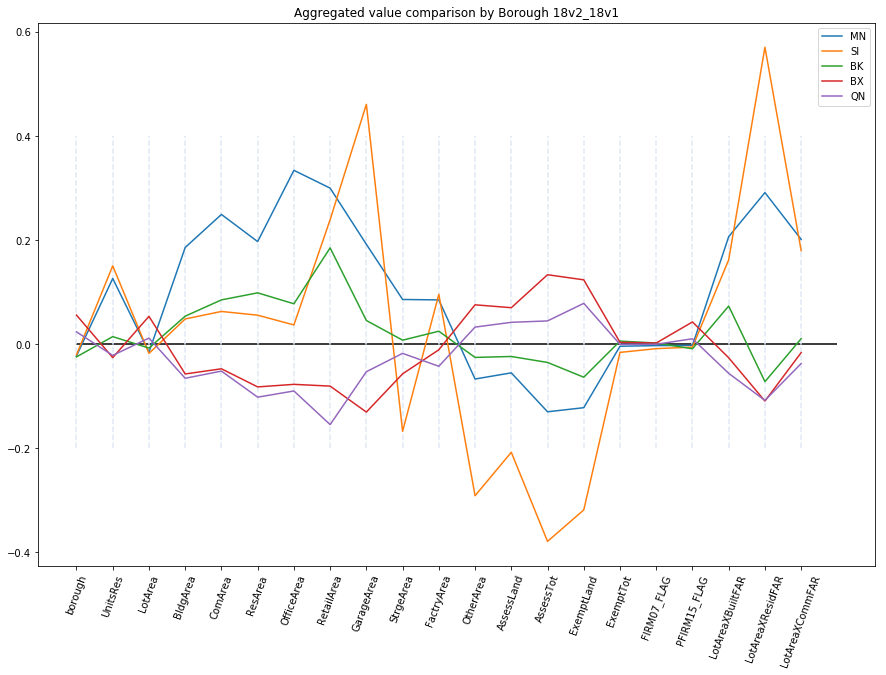

In [21]:
plt.figure(figsize=(15, 10))
plt.plot(range(21), sMN.iloc[1, :], label='MN')
plt.plot(range(21), sSI.iloc[1, :], label='SI')
plt.plot(range(21), sBK.iloc[1, :], label='BK')
plt.plot(range(21), sBX.iloc[1, :], label='BX')
plt.plot(range(21), sQN.iloc[1, :], label='QN')
# plt.plot(range(21), summary_pct.iloc[1, :], label='18v2 vs 18v1')
# plt.plot(range(21), summary_pct.iloc[2, :], label='18v11 vs 18v1')
# plt.plot(range(21), summary_pct.iloc[2, :], label='17v11 vs 18v1')
plt.hlines(0, 0, 21, color = 'black')
for i in range(21):
    plt.vlines(i, -0.2, 0.4, color = '#e1e9f7', linestyles='dashed')
plt.xticks(range(21), summary_pct.columns, rotation=70)
plt.title('Aggregated value comparison by Borough 18v2_18v1')
plt.legend()
plt.show()

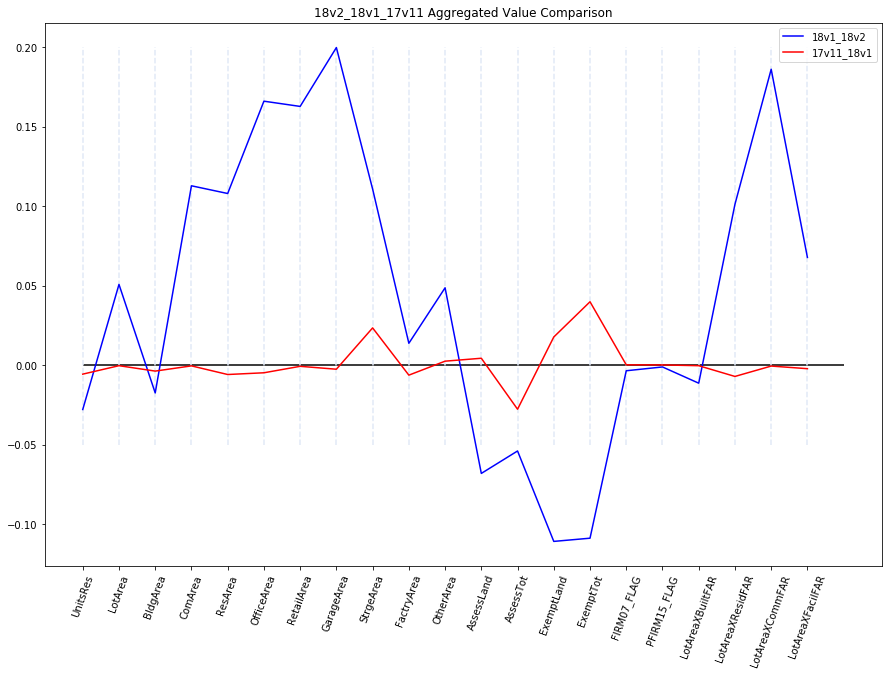

In [67]:
plt.figure(figsize=(15, 10))
plt.plot(range(21), summary_pct.iloc[1, :], color = 'blue', label='18v1_18v2')
plt.plot(range(21), summary_pct.iloc[2, :], color = 'red', label='17v11_18v1')
plt.hlines(0, 0, 21, color = 'black')
for i in range(21):
    plt.vlines(i, -0.05, 0.2, color = '#e1e9f7', linestyles='dashed')
plt.xticks(range(21), summary_pct.columns, rotation=70)
plt.title('18v2_18v1_17v11 Aggregated Value Comparison')
plt.legend()
plt.savefig('18v2_18v1_17v11_Aggregated_Value_Comparison.png', bbox_inches='tight')
plt.show()